In [1]:
import pandas as pd
from dateutil.parser import parse
import re

summaries = []
MODELS = ['gpt-3.5-turbo',
 'insolvency_bot_with_gpt-3.5-turbo',
 'gpt-4',
 'insolvency_bot_with_gpt-4',
 'gpt-4o',
 'insolvency_bot_with_gpt-4o',
 'gemini-2.0-pro-exp-02-05',
 'insolvency_bot_with_gemini-2.0-pro-exp-02-05',
 'claude-3-5-sonnet-20241022',
 'insolvency_bot_with_claude-3-5-sonnet-20241022',
'llama3.1-70b',
'insolvency_bot_with_llama3.1-70b',
'DeepSeek-R1',
'insolvency_bot_with_DeepSeek-R1',
'Mistral-Large-2411',
'insolvency_bot_with_Mistral-Large-2411',
         ]
DATASETS = ["train", "test"]

for MODEL in MODELS:
    if  "deepseek" in MODEL:
        continue
    for DATASET in DATASETS:

        filename = f"scores_{DATASET}_{MODEL}.csv"
        if MODEL=='insolvency_bot_with_Mistral-Large-2411':
            filename = re.sub("train", "test", filename) # TODO DELETE
            
        # if "gemini" in MODEL and DATASET=="test":continue
        df = pd.read_csv(filename, encoding="utf-8", sep="\t")
        
        # Drop the TOTAL row
        df = df[df.question_no != "TOTAL"]
        
        summaries.append((MODEL, DATASET, df.bot_response_time.median(),  df["bot_score"].sum(), df["max_points_available"].sum()))

In [2]:
release_dates = {
'gpt-3.5-turbo':'2024-01-25',
 'gpt-4':'2024-03-14',
 'gpt-4o':'2024-05-13',
 'gemini-2.0-pro-exp-02-05':'2025-02-05',
'llama3.1-70b':'2024-07-23',
 'claude-3-5-sonnet-20241022':'2024-10-22',
'Mistral-Large-2411':'2024-11-18',
'DeepSeek-R1':'2025-01-20',
}

In [3]:
num_parameters = {
'gpt-3.5-turbo':20e9,
 'gpt-4':1.76e12,
 'gpt-4o':1.76e12/6,
 'gemini-2.0-pro-exp-02-05':1.5e12,
'llama3.1-70b':70e9,
 'claude-3-5-sonnet-20241022':175e9,
'Mistral-Large-2411':123e12,
'DeepSeek-R1':671e9,
}

In [4]:
for m, d in release_dates.items():
    print (parse(d).strftime("%d %B %Y"), ":", m)

25 January 2024 : gpt-3.5-turbo
14 March 2024 : gpt-4
13 May 2024 : gpt-4o
05 February 2025 : gemini-2.0-pro-exp-02-05
23 July 2024 : llama3.1-70b
22 October 2024 : claude-3-5-sonnet-20241022
18 November 2024 : Mistral-Large-2411
20 January 2025 : DeepSeek-R1


In [5]:
df_summary = pd.DataFrame()
df_summary["model"] = [s[0] for s in summaries]
df_summary["dataset"] = [s[1] for s in summaries]
df_summary["median_response_time"] = [s[2] for s in summaries]
df_summary["total_score"] = [s[3] for s in summaries]
df_summary["available_score"] = [s[4] for s in summaries]

In [6]:
df_summary["percentage_score"] = df_summary.total_score / df_summary.available_score * 100

In [7]:
df_summary

,model,dataset,median_response_time,total_score,available_score,percentage_score
0,gpt-3.5-turbo,train,5.222760,53.0,298,17.785235
1,gpt-3.5-turbo,test,8.425750,60.0,296,20.270270
2,insolvency_bot_with_gpt-3.5-turbo,train,5.474656,85.0,298,28.523490
3,insolvency_bot_with_gpt-3.5-turbo,test,9.466624,87.5,296,29.560811
4,gpt-4,train,21.641649,86.5,298,29.026846
5,gpt-4,test,33.479660,61.5,296,20.777027
6,insolvency_bot_with_gpt-4,train,33.877039,107.5,298,36.073826
7,insolvency_bot_with_gpt-4,test,52.644380,139.0,296,46.959459
8,gpt-4o,train,4.615740,71.0,298,23.825503
9,gpt-4o,test,4.961722,63.0,296,21.283784


In [8]:
df_summary.to_csv("score_summary.csv", encoding="utf-8", sep="\t", index=False)

In [9]:
import numpy as np

In [10]:
import fastdatascience

In [11]:
df_summary = df_summary.iloc[::-1]

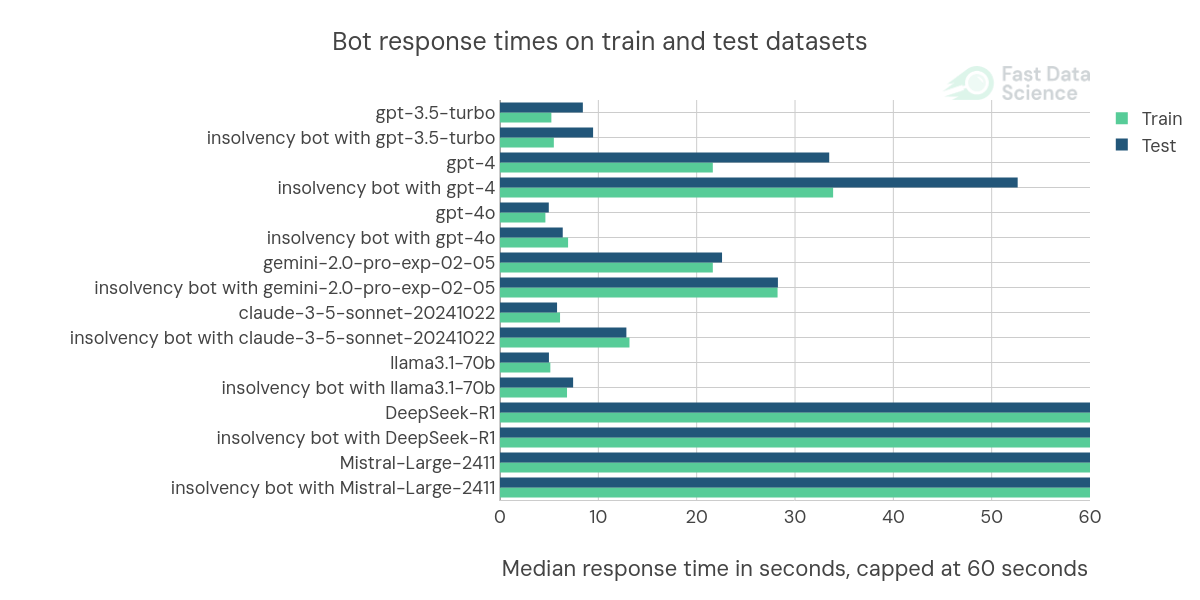

In [12]:
import re
import plotly.graph_objects as px
import numpy

fig = px.Figure(data=[px.Bar(
    name = 'Train',
    y = list(df_summary[df_summary.dataset=="train"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="train"].median_response_time),
    orientation='h'
   ),
                       px.Bar(
    name = 'Test',
    y = list(df_summary[df_summary.dataset=="test"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="test"].median_response_time),
                           orientation='h'
   )
])

fastdatascience.brand(fig, 0.2)


fig.update_layout(
    title="Bot response times on train and test datasets",
    margin=dict(l=500, r=100, t=100, b=100),
    xaxis_title="Median response time in seconds, capped at 60 seconds",
    xaxis_range = [0,60]
)

fig.show(renderer="png")
fig.write_image("bot_response_times.png") 

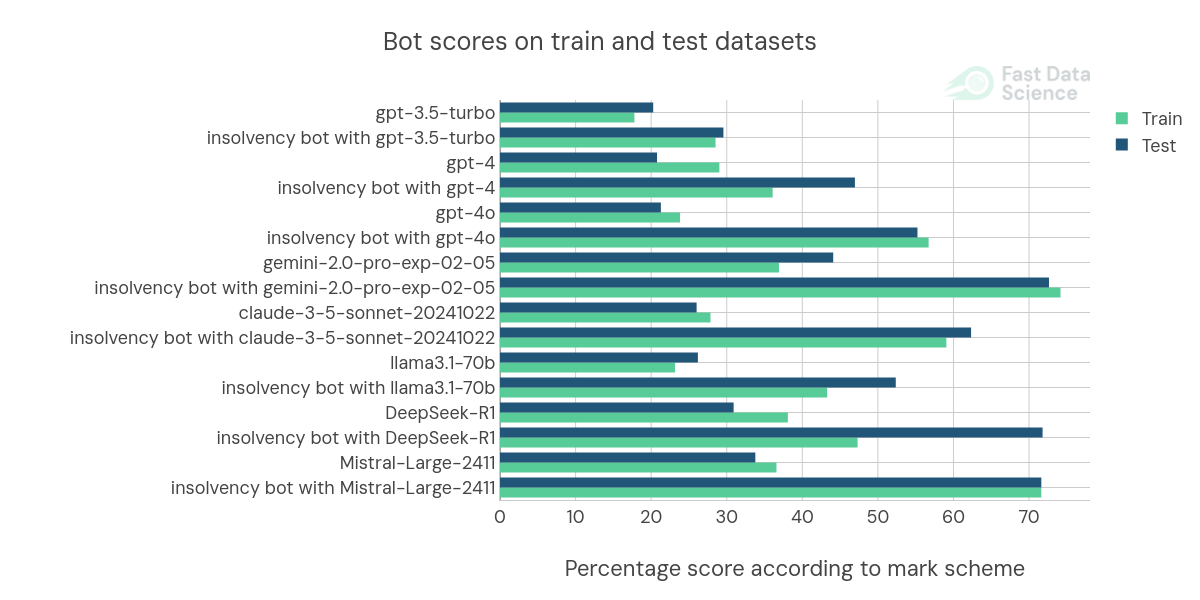

In [13]:
import re
import plotly.graph_objects as px
import numpy
 
 
 
fig = px.Figure(data=[px.Bar(
    name = 'Train',
    y = list(df_summary[df_summary.dataset=="train"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="train"].percentage_score),
    orientation='h'
   ),
                       px.Bar(
    name = 'Test',
    y = list(df_summary[df_summary.dataset=="test"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="test"].percentage_score),
                           orientation='h'
   )
])

fastdatascience.brand(fig, 0.2)

fig.update_layout(
    title="Bot scores on train and test datasets",
    margin=dict(l=500, r=100, t=100, b=100),
    xaxis_title="Percentage score according to mark scheme",
)

fig.show(renderer="png")
fig.write_image("bot_scores.png") 

In [14]:
df_summary

,model,dataset,median_response_time,total_score,available_score,percentage_score
31,insolvency_bot_with_Mistral-Large-2411,test,86.655376,212.0,296,71.621622
30,insolvency_bot_with_Mistral-Large-2411,train,86.655376,212.0,296,71.621622
29,Mistral-Large-2411,test,71.442183,100.0,296,33.783784
28,Mistral-Large-2411,train,73.682108,109.0,298,36.577181
27,insolvency_bot_with_DeepSeek-R1,test,107.657842,212.5,296,71.790541
26,insolvency_bot_with_DeepSeek-R1,train,544.693548,141.0,298,47.315436
25,DeepSeek-R1,test,81.462669,91.5,296,30.912162
24,DeepSeek-R1,train,75.468871,113.5,298,38.087248
23,insolvency_bot_with_llama3.1-70b,test,7.436111,155.0,296,52.364865
22,insolvency_bot_with_llama3.1-70b,train,6.815757,129.0,298,43.288591


In [15]:
from dateutil.parser import parse
release_dates_list = []
for idx in range(len(df_summary)):
    model = df_summary.model.iloc[idx]
    for k in sorted(release_dates, key=lambda x: -len(x)):
        if k in model:
            break
    rd = release_dates[k]
    release_dates_list.append(parse(rd))
df_summary["release_date"] = release_dates_list

/tmp/ipykernel_418631/1905507846.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
params_list = []
for idx in range(len(df_summary)):
    model = df_summary.model.iloc[idx]
    for k in sorted(num_parameters, key=lambda x: -len(x)):
        if k in model:
            break
    rd = num_parameters[k]
    params_list.append(rd)
df_summary["num_parameters"] = params_list

/tmp/ipykernel_418631/3523628780.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



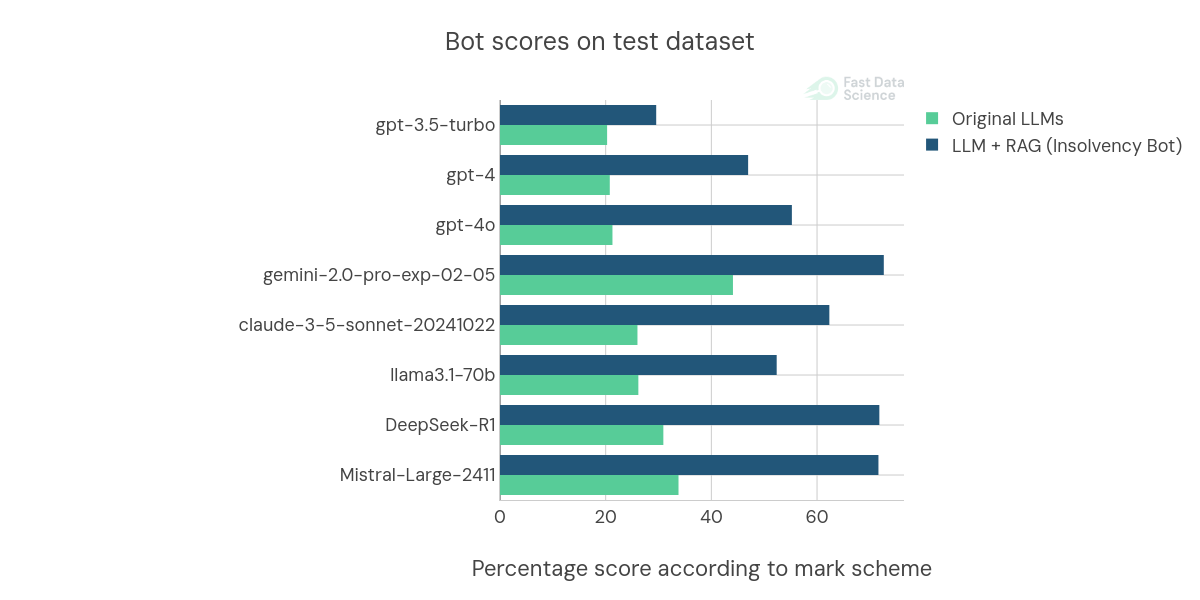

In [17]:
rag_bots = df_summary[df_summary.model.str.contains("insolvency") & (df_summary.dataset=="test")]
orig_bots = df_summary[~df_summary.model.str.contains("insolvency")& (df_summary.dataset=="test")]

import re
import plotly.graph_objects as px
import numpy
 
def clean_up_name(x):
    if x.startswith("insolvency bot with"):
        x = x[20:]
    return x
 
fig = px.Figure(data=[px.Bar(
    name = 'Original LLMs',
    y = list(orig_bots.model.apply(lambda x : re.sub("_", " ", x))),
    x =list(orig_bots.percentage_score),
    orientation='h'
   ),
                       px.Bar(
    name = 'LLM + RAG (Insolvency Bot)',
    y = list(rag_bots.model.apply(lambda x : re.sub("_", " ", x)).apply(clean_up_name)),
    x =list(rag_bots.percentage_score),
                           orientation='h'
   )
])

fastdatascience.brand(fig, 0.2)

fig.update_layout(
    title="Bot scores on test dataset",
    margin=dict(l=500, r=100, t=100, b=100),
    xaxis_title="Percentage score according to mark scheme",
)

fig.show(renderer="png")
fig.write_image("bot_scores.png") 

In [18]:
rag_bots

,model,dataset,median_response_time,total_score,available_score,percentage_score,release_date,num_parameters
31,insolvency_bot_with_Mistral-Large-2411,test,86.655376,212.0,296,71.621622,2024-11-18,1.230000e+14
27,insolvency_bot_with_DeepSeek-R1,test,107.657842,212.5,296,71.790541,2025-01-20,6.710000e+11
23,insolvency_bot_with_llama3.1-70b,test,7.436111,155.0,296,52.364865,2024-07-23,7.000000e+10
19,insolvency_bot_with_claude-3-5-sonnet-20241022,test,12.852271,184.5,296,62.331081,2024-10-22,1.750000e+11
15,insolvency_bot_with_gemini-2.0-pro-exp-02-05,test,28.262327,215.0,296,72.635135,2025-02-05,1.500000e+12
11,insolvency_bot_with_gpt-4o,test,6.380480,163.5,296,55.236486,2024-05-13,2.933333e+11
7,insolvency_bot_with_gpt-4,test,52.644380,139.0,296,46.959459,2024-03-14,1.760000e+12
3,insolvency_bot_with_gpt-3.5-turbo,test,9.466624,87.5,296,29.560811,2024-01-25,2.000000e+10


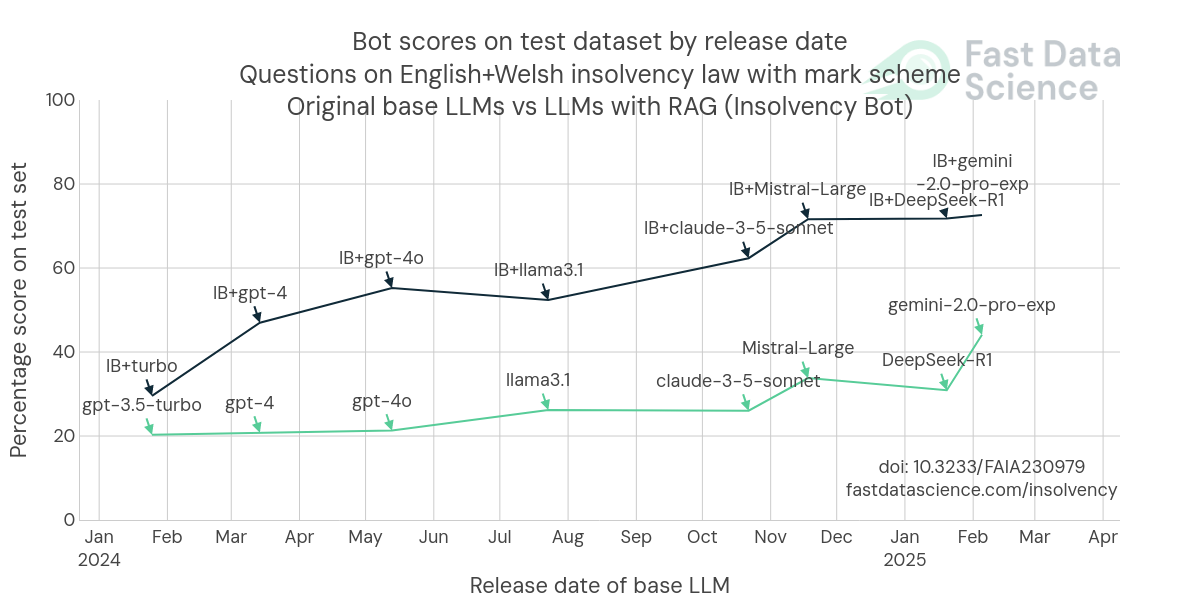

In [19]:
orig_bots_sorted = orig_bots.sort_values("release_date")
rag_bots_sorted = rag_bots.sort_values("release_date")

import fastdatascience

import plotly.express as px
fig = px.line(x=orig_bots_sorted.release_date, y=orig_bots_sorted.percentage_score,
                title="Bot scores on test dataset by release date<br>Questions on English+Welsh insolvency law with mark scheme<br>Original base LLMs vs LLMs with RAG (Insolvency Bot)")
fig.add_traces(
    list(px.line(x=rag_bots_sorted.release_date, y=rag_bots_sorted.percentage_score).select_traces())
)

fig.data[1].line.color = "rgb(16, 42, 56)"

fastdatascience.brand(fig, opacity=0.25)

def clean_up(x):
    x = re.sub('-70.*', '', x)
    x = re.sub('-202410.*', '', x)
    x = re.sub('-02-05.*', '', x)
    x = re.sub('-2411.*', '', x)
    x = re.sub(r"IB\+gpt-3.5-turbo", "IB+turbo", x)
    if "IB" in x and "gemini" in x:
        x = x + "<br>&nbsp;"
        x = re.sub("-2", "<br>-2", x)
    if "IB" in x and "DeepSeek" in x:
        x = "&nbsp;<br>" + x
    return x

for idx in range(len(orig_bots_sorted)):
        
    fig.add_annotation(
        x=orig_bots_sorted.release_date.iloc[idx], y=orig_bots_sorted.percentage_score.iloc[idx], # position
        text=clean_up(orig_bots_sorted.model.iloc[idx]), # text
        #showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="rgb(87, 204, 152)",
    )

    xanchor = None
    yanchor = None
    # if "insolvency" in rag_bots_sorted.model.iloc[idx] and "gemini" in rag_bots_sorted.model.iloc[idx]:
    #     xanchor = "left"
    # if "insolvency" in rag_bots_sorted.model.iloc[idx] and "Deep" in rag_bots_sorted.model.iloc[idx]:
    #     yanchor = "bottom"
        # xanchor = "right"
            
    fig.add_annotation(
        x=rag_bots_sorted.release_date.iloc[idx], y=rag_bots_sorted.percentage_score.iloc[idx], # position
        text=clean_up(re.sub("insolvency_bot_with_", "IB+", rag_bots_sorted.model.iloc[idx])), # text
        #showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="rgb(16, 42, 56)",
        xanchor=xanchor,
        yanchor=yanchor
    )

fig.add_annotation(
    x=rag_bots_sorted.release_date.iloc[-1], y=10, # position
    text="doi: 10.3233/FAIA230979<br>fastdatascience.com/insolvency", # text
    showarrow=False
)

fig.layout.yaxis.range= [0,100]
fig.layout.yaxis.title = "Percentage score on test set"
fig.layout.xaxis.title = "Release date of base LLM"
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")

fig.show(renderer="png")
fig.write_image("bot_scores_timeline.png") 

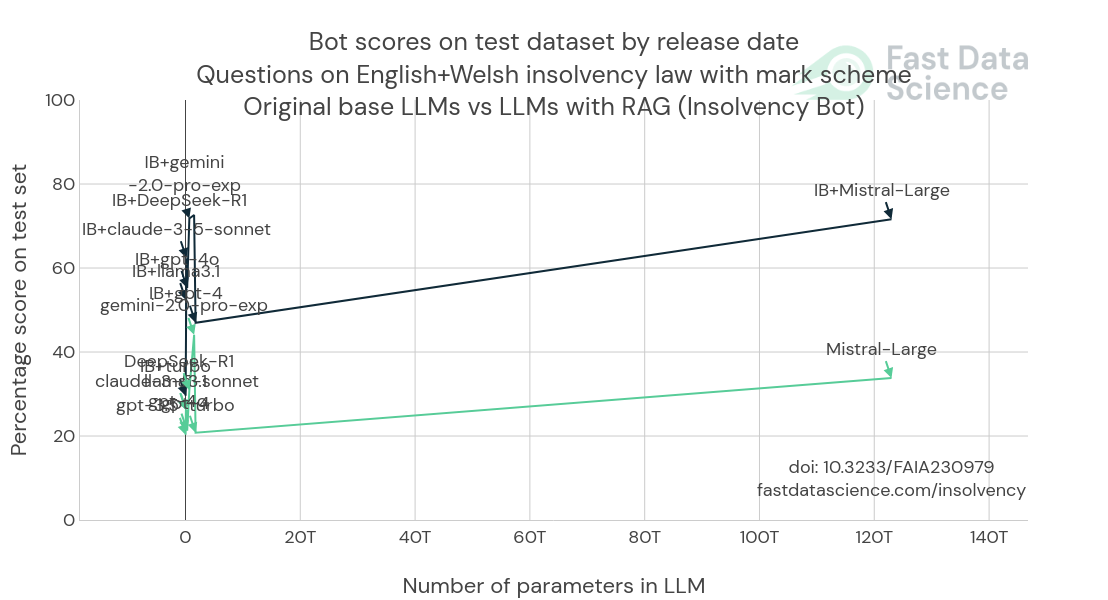

In [25]:
orig_bots_sorted = orig_bots.sort_values("num_parameters")
rag_bots_sorted = rag_bots.sort_values("num_parameters")

import fastdatascience

import plotly.express as px
fig = px.line(x=orig_bots_sorted.num_parameters, y=orig_bots_sorted.percentage_score,
                title="Bot scores on test dataset by release date<br>Questions on English+Welsh insolvency law with mark scheme<br>Original base LLMs vs LLMs with RAG (Insolvency Bot)")
fig.add_traces(
    list(px.line(x=rag_bots_sorted.num_parameters, y=rag_bots_sorted.percentage_score).select_traces())
)

fig.data[1].line.color = "rgb(16, 42, 56)"

fastdatascience.brand(fig, opacity=0.25)

def clean_up(x):
    x = re.sub('-70.*', '', x)
    x = re.sub('-202410.*', '', x)
    x = re.sub('-02-05.*', '', x)
    x = re.sub('-2411.*', '', x)
    x = re.sub(r"IB\+gpt-3.5-turbo", "IB+turbo", x)
    if "IB" in x and "gemini" in x:
        x = x + "<br>&nbsp;"
        x = re.sub("-2", "<br>-2", x)
    if "IB" in x and "DeepSeek" in x:
        x = "&nbsp;<br>" + x
    return x

for idx in range(len(orig_bots_sorted)):
        
    fig.add_annotation(
        x=orig_bots_sorted.num_parameters.iloc[idx], y=orig_bots_sorted.percentage_score.iloc[idx], # position
        text=clean_up(orig_bots_sorted.model.iloc[idx]), # text
        #showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="rgb(87, 204, 152)",
    )

    xanchor = None
    yanchor = None
    # if "insolvency" in rag_bots_sorted.model.iloc[idx] and "gemini" in rag_bots_sorted.model.iloc[idx]:
    #     xanchor = "left"
    # if "insolvency" in rag_bots_sorted.model.iloc[idx] and "Deep" in rag_bots_sorted.model.iloc[idx]:
    #     yanchor = "bottom"
        # xanchor = "right"
            
    fig.add_annotation(
        x=rag_bots_sorted.num_parameters.iloc[idx], y=rag_bots_sorted.percentage_score.iloc[idx], # position
        text=clean_up(re.sub("insolvency_bot_with_", "IB+", rag_bots_sorted.model.iloc[idx])), # text
        #showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="rgb(16, 42, 56)",
        xanchor=xanchor,
        yanchor=yanchor
    )

fig.add_annotation(
    x=rag_bots_sorted.num_parameters.iloc[-1], y=10, # position
    text="doi: 10.3233/FAIA230979<br>fastdatascience.com/insolvency", # text
    showarrow=False
)

fig.layout.yaxis.range= [0,100]
fig.layout.yaxis.title = "Percentage score on test set"
fig.layout.xaxis.title = "Number of parameters in LLM"
# fig.update_xaxes(
#     dtick="M1",
#     tickformat="%b\n%Y")

fig.show()
# fig.show(renderer="png")
# fig.write_image("bot_scores_num_params.png") 